In [21]:
from scipy.stats import gamma, norm, truncnorm
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

In [2]:
def get_ab(mean, std, clip_a, clip_b, period=0.5):

    bins = int((clip_b-clip_a)*60/period)

    a, b = (clip_a - mean) / std, (clip_b - mean) / std
    
    return a, b, bins

2000.0


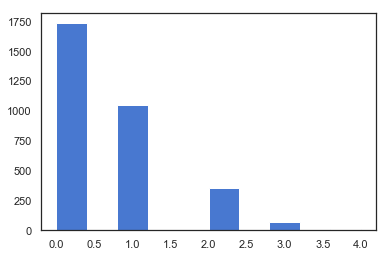

In [28]:
# Node id list
N = np.arange(6430)

# Share of node depots
depot_share = .5

# Depot list
P = np.random.choice(N, size=int(depot_share*len(N)))

# Number of FAVs
n_favs = 2000

# How many FAVs for each depot?
favs_count_depot = np.zeros(len(P))

unassigned_favs = n_favs
while unassigned_favs > 0:
    favs_count_depot[random.randint(0,len(P)-1)]+=1
    unassigned_favs-=1

print(sum(favs_count_depot))
_ = plt.hist(favs_count_depot)

In [29]:
# (mean, std, clip_a, clip_b)
avail_features = (2,1,1,4)
avail_a, avail_b, avail_bins = get_ab(*avail_features, period=0.5)
print("Availability:", avail_a, avail_b, avail_bins)

# (mean, std, clip_a, clip_b)
earliest_features = (8,1,5,9)
ear_a, ear_b, ear_bins = get_ab(*earliest_features, period=0.5)
print("    Earliest:", ear_a, ear_b, ear_bins)

Availability: -1.0 2.0 360
    Earliest: -3.0 1.0 480


In [30]:
# What time favs arrive in each depot?
earliest_times = []
contract_durations = []

depot_info = dict()
for n in range(len(P)):
    
    n_favs = int(favs_count_depot[n])
    
    depot_info[n] = list()
    
    # Earlist times of FAVs arriving in node n
    earliest_time = truncnorm.rvs(ear_a, ear_b, size=n_favs) + earliest_features[0]
    
    # Contract durations of FAVs arriving in node n
    contract_duration = truncnorm.rvs(avail_a, avail_b, size=n_favs) + avail_features[0]

    # Earlist times and contract durations
    for e, c in zip(earliest_time, contract_duration):

        # Contract duration can't surpass last time period
        c = min(c, earliest_features[3] - e)

        depot_info[n].append((e,c))
    
    earliest_times.extend(earliest_time)
    contract_durations.extend(contract_duration)

FileNotFoundError: [Errno 2] No such file or directory: 'img/earliest_service_time.png'

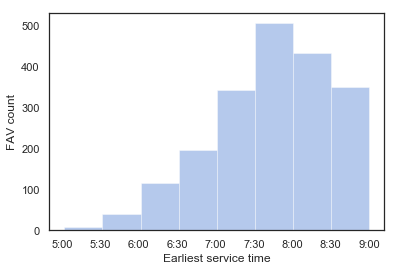

In [35]:
# Earliset time distribution
# _ = plt.hist(earliest_times, bins=8)
sns.distplot(earliest_times, bins=8, kde=False, color="b")
plt.xlabel("Earliest service time")
plt.ylabel("FAV count")
plt.xticks(
    np.linspace(earliest_features[2], earliest_features[3], 9),
    ["5:00","5:30","6:00","6:30","7:00","7:30","8:00", "8:30","9:00"]
)
plt.savefig("img/earliest_service_time.png", bbox_inches='tight', dpi=300)

([<matplotlib.axis.XTick at 0x2ed0f1a7eb8>,
 <a list of 7 Text xticklabel objects>)

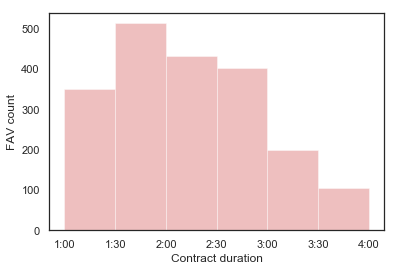

In [33]:
# Earliset time distribution
# _ = plt.hist(contract_durations, bins=6)
sns.distplot(contract_durations, bins=6, kde=False, color="r")
plt.xlabel("Contract duration")
plt.ylabel("FAV count")
plt.xticks(
    np.linspace(avail_features[2],avail_features[3], 7),
    ["1:00","1:30","2:00","2:30","3:00","3:30","4:00"]
)

NameError: name 'my_mean' is not defined

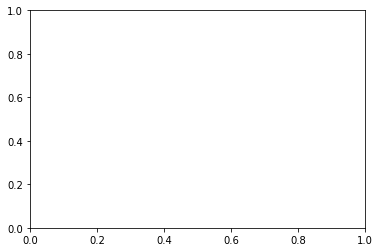

In [11]:
fig, ax = plt.subplots(1, 1)

# (mean, std, clip_a, clip_b)
arrival_features = (8,1,5,9)

a, b, mins = get_ab(*arrival_features, period=0.5)

mean, var, skew, kurt = truncnorm.stats(a, b, moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(truncnorm.ppf(0.01, a, b), truncnorm.ppf(0.99, a, b), mins)

ax.plot(x + my_mean, truncnorm.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='truncnorm pdf')

# Alternatively, the distribution object can be called (as a function)
# to fix the shape, location and scale parameters. This returns a
# “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:
rv = truncnorm(a, b)
ax.plot(x + my_mean, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = truncnorm.ppf([0.001, 0.5, 0.999], a, b)
np.allclose([0.001, 0.5, 0.999], truncnorm.cdf(vals, a, b))

r = truncnorm.rvs(a, b, size=1000) + my_mean

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

rv.pdf(0)